In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# 设置中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [9]:
TestInfo = pd.read_csv('TestInfo.csv')
TestInfo.head()

,TestId,Device,CPUFrequency (MHz),Threads,MLNetwork
0,17,Device_0,1000,5,AlexNet
1,16,Device_0,1000,5,AlexNet
2,39,Device_1,1000,3,AlexNet
3,31,Device_0,1000,5,AlexNet
4,30,Device_0,1000,4,AlexNet


In [10]:

TestResults = pd.read_pickle('TestResults.pickle')
TestResults.head()

,TestId,Build,Optimised,Time (ms),PeakMemory (MB)
0,33,10,N,125.0,307
1,43,10,Y,50.0,50
2,36,10,N,50.0,458
3,1,2,N,64.0,451
4,16,8,N,104.0,453


In [11]:
# 通过TestId链接两个表
df = pd.merge(TestInfo, TestResults, on='TestId')
df

,TestId,Device,CPUFrequency (MHz),Threads,MLNetwork,Build,Optimised,Time (ms),PeakMemory (MB)
0,17,Device_0,1000,5,AlexNet,9,N,102.000000,449
1,16,Device_0,1000,5,AlexNet,8,N,104.000000,453
2,39,Device_1,1000,3,AlexNet,10,N,333.333333,302
3,31,Device_0,1000,5,AlexNet,10,N,100.000000,449
4,30,Device_0,1000,4,AlexNet,10,N,125.000000,450
5,25,Device_0,2000,5,AlexNet,8,N,53.000000,458
6,45,Device_0,1000,4,MobileNet,10,Y,25.000000,85
7,34,Device_0,2000,3,AlexNet,10,N,83.333333,308
8,6,Device_0,1000,5,MobileNet,7,Y,25.000000,450
9,27,Device_0,1000,1,AlexNet,10,N,500.000000,300


In [13]:
# 按照时间排序
df = df.sort_values(by='Time (ms)')
df

,TestId,Device,CPUFrequency (MHz),Threads,MLNetwork,Build,Optimised,Time (ms),PeakMemory (MB)
27,8,Device_0,1000,5,MobileNet,9,Y,19.000000,449
10,46,Device_0,1000,5,MobileNet,10,Y,20.000000,86
36,5,Device_0,1000,5,MobileNet,6,Y,21.000000,449
26,7,Device_0,1000,5,MobileNet,8,Y,23.000000,451
8,6,Device_0,1000,5,MobileNet,7,Y,25.000000,450
6,45,Device_0,1000,4,MobileNet,10,Y,25.000000,85
23,44,Device_0,1000,3,MobileNet,10,Y,33.333333,53
12,24,Device_0,2000,5,AlexNet,7,N,50.000000,458
22,21,Device_0,2000,5,AlexNet,4,N,50.000000,457
40,36,Device_0,2000,5,AlexNet,10,N,50.000000,458


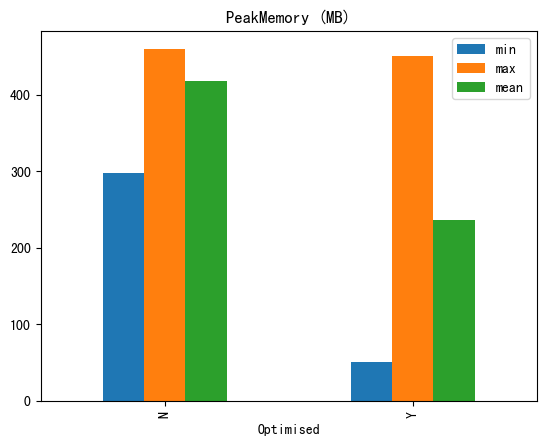

In [17]:
# 根据Optimised分组，得出PeakMemory (MB)的最小值、最大值、平均值

df.groupby('Optimised')['PeakMemory (MB)'].agg(['min', 'max', 'mean']).plot(kind='bar')
plt.title('PeakMemory (MB)')
plt.show()
# 结论1: 优化后的程序内存占用更少

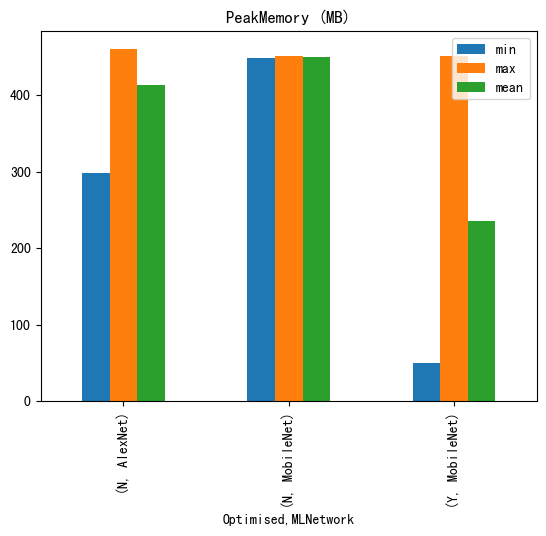

In [18]:
# 根据Optimised和MLNetwork分组，得出PeakMemory (MB)的最小值、最大值、平均值
df.groupby(['Optimised', 'MLNetwork'])['PeakMemory (MB)'].agg(['min', 'max', 'mean']).plot(kind='bar')
plt.title('PeakMemory (MB)')
plt.show()

# 结论2: 优化后的程序在MobileNet时内存占用更少

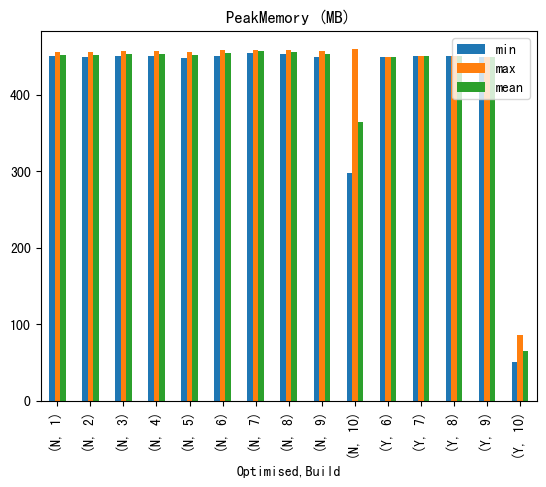

In [19]:
# 根据Optimised和Build分组，得出PeakMemory (MB)的最小值、最大值、平均值
df.groupby(['Optimised', 'Build'])['PeakMemory (MB)'].agg(['min', 'max', 'mean']).plot(kind='bar')
plt.title('PeakMemory (MB)')
plt.show()

# 结论3: 未优化的程序里，build=10时内存占用更少
# 结论4: 优化后的程序里，build=10的内存改善最大

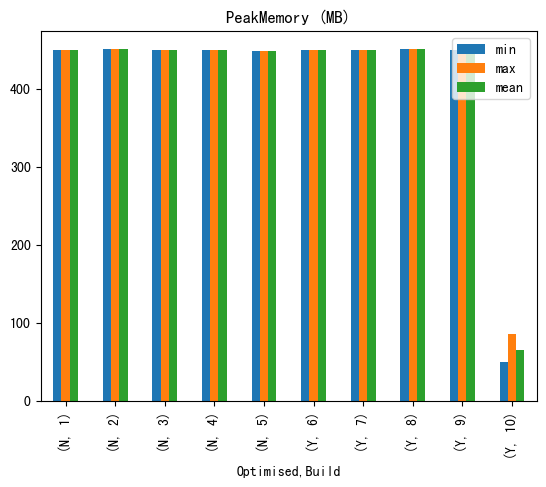

In [20]:
# 在MLNetwork=MobileNet时，根据Optimised和Build分组，得出PeakMemory (MB)的最小值、最大值、平均值
df[df['MLNetwork'] == 'MobileNet'].groupby(['Optimised', 'Build'])['PeakMemory (MB)'].agg(['min', 'max', 'mean']).plot(kind='bar')
plt.title('PeakMemory (MB)')
plt.show()

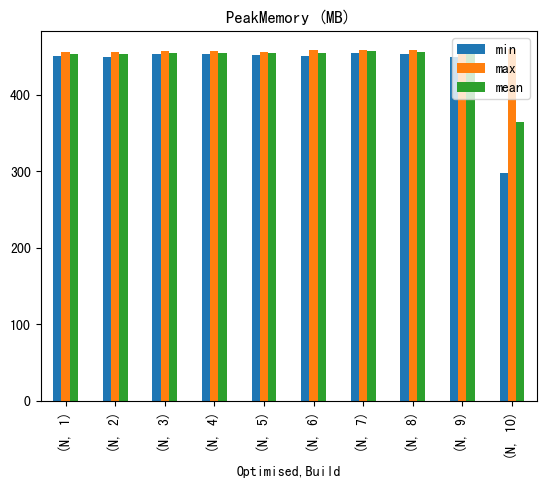

In [22]:
# 在MLNetwork=AlexNet时，根据Optimised和Build分组，得出PeakMemory (MB)的最小值、最大值、平均值
df[df['MLNetwork'] == 'AlexNet'].groupby(['Optimised', 'Build'])['PeakMemory (MB)'].agg(['min', 'max', 'mean']).plot(kind='bar')
plt.title('PeakMemory (MB)')
plt.show()

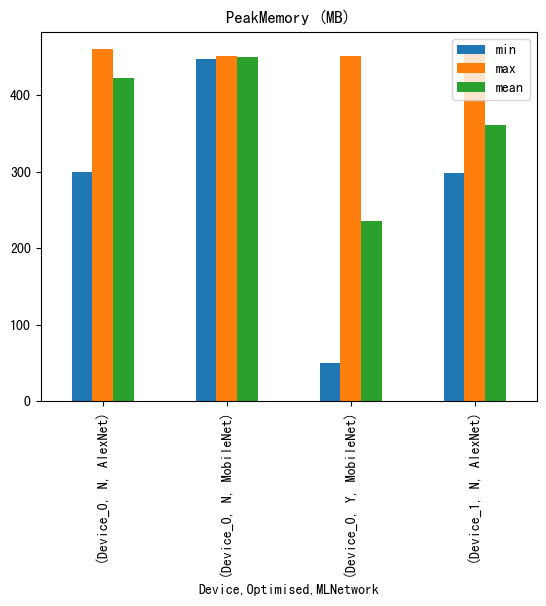

In [24]:
# 根据Device、Optimised和MLNetwork分组，得出PeakMemory (MB)的最小值、最大值、平均值
df.groupby(['Device', 'Optimised', 'MLNetwork'])['PeakMemory (MB)'].agg(['min', 'max', 'mean']).plot(kind='bar')
plt.title('PeakMemory (MB)')
plt.show()

# 结论：Device1只用在AlexNet上，Device2只用在MobileNet上

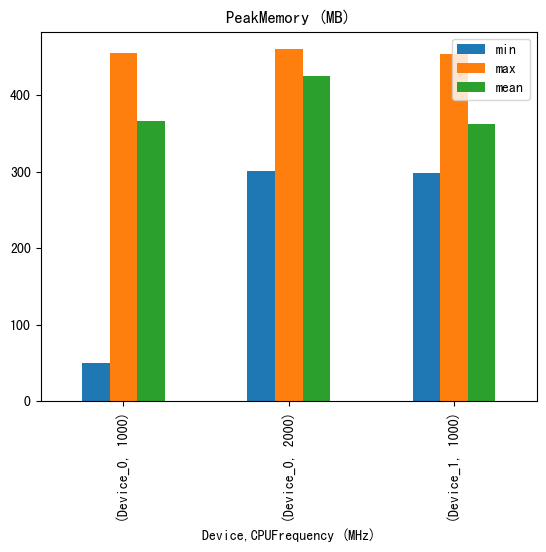

In [26]:
# 根据Device和CPUFrequency (MHz)分组，得出PeakMemory (MB)的最小值、最大值、平均值
df.groupby(['Device', 'CPUFrequency (MHz)'])['PeakMemory (MB)'].agg(['min', 'max', 'mean']).plot(kind='bar')
plt.title('PeakMemory (MB)')
plt.show()

# Device0的频率有两个版本，频率为2000时内存占用更多，可以说明数据交换更多

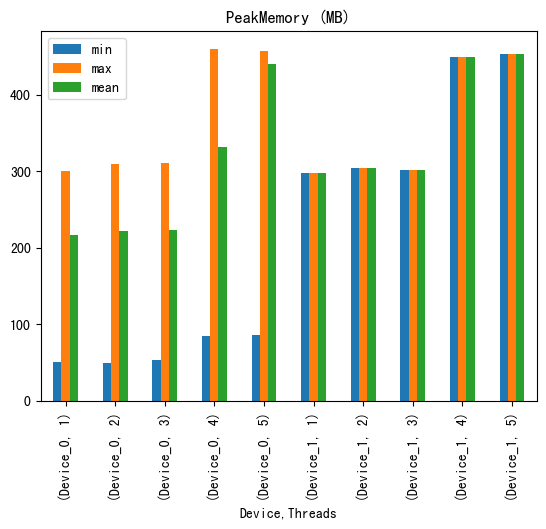

In [27]:
# 根据Device、Threads分组，得出PeakMemory (MB)的最小值、最大值、平均值
df.groupby(['Device', 'Threads'])['PeakMemory (MB)'].agg(['min', 'max', 'mean']).plot(kind='bar')
plt.title('PeakMemory (MB)')
plt.show()


In [37]:
# 根据Device、Optimised、MLNetwork和Build分组，得到PeakMemory (MB)的值，如果有值，按照时间排序并画出
df.groupby(['Device', 'Optimised', 'MLNetwork', 'Build'])['PeakMemory (MB)'].apply(lambda x: x.sort_values())

Device    Optimised  MLNetwork  Build    
Device_0  N          AlexNet    1      29    450
                                       33    456
                                2      41    449
                                       28    456
                                3      35    453
                                       17    457
                                4      19    453
                                       22    457
                                5      25    452
                                       39    456
                                6      43    450
                                       18    458
                                7      45    455
                                       12    458
                                8      1     453
                                       5     458
                                9      0     449
                                       30    457
                                10     9     300
                           

In [ ]:
# 结论：看出build随着时间的增加而增加，说明版本迭代更新。
# 结论：先在Device=0上进行的AlexNet没有优化的版本，再进行MobileNet1-5没优化的版本，再进行6-10的优化版本。
# 结论：最后在Device=1上对AlexNet进行没有优化的版本

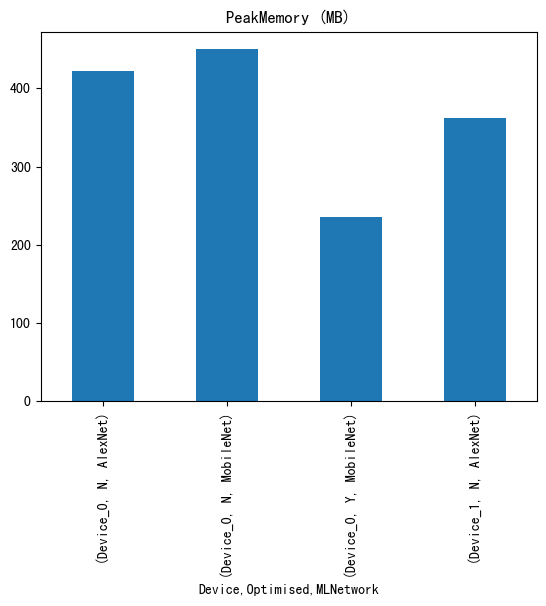

In [38]:
# 根据Device、Optimised、MLNetwork得到PeakMemory (MB)平均值，并画出
df.groupby(['Device', 'Optimised', 'MLNetwork'])['PeakMemory (MB)'].mean().plot(kind='bar')
plt.title('PeakMemory (MB)')
plt.show()

In [39]:
# 结论：优化后的MobileNet和在Device_1上的AlexNet内存占用更少